In [75]:
import pandas as pd
import numpy as np
from sklearn import cluster as skclust
from sklearn import preprocessing as skproc
from sklearn import metrics as skmetric
import matplotlib.pyplot as plt
import time
import re
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
import pandas as pd 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv("data/county_facts.csv")

In [17]:
rename_map={"PST045214": "Pop2014",
            "PST040210": "Pop2010EST",
            "PST120214": "Pop%Change",
            "POP010210": "Pop2010",
            "AGE135214": "Under5%",
            "AGE295214": "Under18%",
            "AGE775214": "Over65%",
            "SEX255214": "Female%",
            "RHI125214": "White%",
            "RHI225214": "Black%",
            "RHI325214": "NativeA%",
            "RHI425214": "Asian%",
            "RHI525214": "PIsland%",
            "RHI625214": "TwoRace%",
            "RHI725214": "Latino",
            "RHI825214": "WhiteNLat%",
            "POP715213": "SameHouse1yr%",
            "POP645213": "ForeignBorn%",
            "POP815213": "NonEnglish%",
            "EDU635213": "HighSchoolGrad%",
            "EDU685213": "Bachelor%",
            "VET605213": "Veteran",
            "LFE305213": "TravelTime",
            "HSG010214": "HousingUnits",
            "HSG445213": "OwnershipRate",
            "HSG096213": "UnitsinMultiUnit%",
            "HSG495213": "MedianValueHousing",
            "HSD410213": "Households",
            "INC910213": "PerCapitaIncome",
            "INC110213": "MedianIncome",
            "PVY020213": "%BelowPoverty",
            "BZA010213": "PrivateNotFarmsEstablish",
            "BZA110213": "PrivateNotFarmEmploy",
            "BZA115213": "NotFarm%Change",
            "NES010213": "NonEmployerEstablish",
            "SBO315207": "Black-owned%",
            "SBO115207": "Native-owned%",
            "SBO215207": "Asian-owned%",
            "SBO515207": "PIslnder-owned%",
            "SBO415207": "Hispanic-owned%",
            "SBO015207": "Woman-owned",
            "MAN450207": "Manfact shipments 1k",
            "WTN220207": "Merchant sales 1k",
            "RTN130207": "Retail sales 1k",
            "RTN131207": "Retail sales/capita",
            "AFN120207": "Accomd/FoodServ sales 1k",
            "BPS030214": "BuildingPermits",
            "LND110210": "LandArea",
            "POP060210": "Pop/SqMile"}
df=df.rename(index=str,columns=rename_map)

In [18]:
## aggregate state/national data hold NaN values in state_abbrev
counties = df.dropna()
not_counties = df[~df.index.isin(counties.index)]

In [19]:
vote_data = pd.read_csv("data/US_County_Level_Presidential_Results_12-16.csv").rename(columns={"FIPS":"fips"})
rm = ['combined_fips', 'state_abbr', 'Unnamed: 0', 'county_name', 'county_fips', 'state_fips']
counties = pd.merge(counties, vote_data, on="fips").drop(rm, axis=1).dropna()
swing_states=["AZ","FL","GA","NH","NC","CO","MI","NV","VA","PA","WI","OH"]
swingers=df[df['state_abbreviation'].isin(swing_states)]

In [20]:
### County size / population density
geographic_predictors =  ["Pop/SqMile"]

#### Population/Age/Education
county_demog_predictors = ["Pop%Change", "Under5%","Under18%", "Over65%",
                          "HighSchoolGrad%","Bachelor%", "Veteran"]
### HOUSING 
housing_predictors = ["SameHouse1yr%", "TravelTime", "HousingUnits", "OwnershipRate", "UnitsinMultiUnit%",
                        "MedianValueHousing", "Households"]
### ECONOMIC
econ_predictors = ["PerCapitaIncome", "MedianIncome", "%BelowPoverty", "PrivateNotFarmsEstablish",
                   "PrivateNotFarmEmploy", "NotFarm%Change", "NonEmployerEstablish","Manfact shipments 1k",
                   "Merchant sales 1k", "Retail sales/capita", "Retail sales/capita", "BuildingPermits"]
##### ETHNIC 
racial_predictors = ["Female%", "White%", "Black%","NativeA%","Asian%","PIsland%",
                     "TwoRace%","Latino","WhiteNLat%","ForeignBorn%",
                     "NonEnglish%"]
#### ETHNIC ECONO
racial_econo_predictors = ["Black-owned%","Native-owned%","Asian-owned%","PIslnder-owned%","Woman-owned"]

## VOTING
vote_predictors = ['total_votes_2016', 'per_dem_2016', 'per_gop_2016', 'per_point_diff_2016',
                   'total_votes_2012', 'per_dem_2012', 'per_gop_2012', 'per_point_diff_2012', "turnout_2016", "turnout_2012"]
#     ['votes_dem_2016', 'votes_gop_2016', 'total_votes_2016', 'per_dem_2016',
#        'per_gop_2016', 'diff_2016', 'per_point_diff_2016', 'total_votes_2012',
#        'votes_dem_2012', 'votes_gop_2012', 'per_dem_2012', 'per_gop_2012',
#        'diff_2012', 'per_point_diff_2012']

In [21]:
# racial: kmeans 3 demographic: kmeans 3 economic: 3 spectral housing: kmeans 3socioeconomic: spectral 4voting: kmeans 2

In [22]:
X = skproc.normalize(df[econ_predictors])
spec = skclust.SpectralClustering(n_clusters=3, n_jobs=-1)
df['Economic_Cluster']=spec.fit_predict(X)
X = skproc.normalize(df[racial_econo_predictors])
spec = skclust.SpectralClustering(n_clusters=4, n_jobs=-1)
df['Racial_Economic_Cluster']=spec.fit_predict(X)
kmeans = skclust.KMeans(n_clusters=k, n_jobs=-1, precompute_distances=True, n_init=15)

NameError: name 'k' is not defined

In [29]:
model=AgglomerativeClustering(n_clusters=4)
swingers['Racial_Cluster']=model.fit_predict(swingers[racial_predictors])

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [40]:
swingers.groupby('Racial_Cluster').count()

,fips,area_name,state_abbreviation,Pop2014,Pop2010EST,Pop%Change,Pop2010,Under5%,Under18%,Over65%,...,Woman-owned,Manfact shipments 1k,Merchant sales 1k,Retail sales 1k,Retail sales/capita,Accomd/FoodServ sales 1k,BuildingPermits,LandArea,Pop/SqMile,Economic_Cluster
Racial_Cluster,,,,,,,,,,,,,,,,,,,,,
0,268,268,268,268,268,268,268,268,268,268,...,268,268,268,268,268,268,268,268,268,268
1,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
2,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
3,464,464,464,464,464,464,464,464,464,464,...,464,464,464,464,464,464,464,464,464,464


In [34]:
def clusteringalgo(x,y,y2,df,df2):
    model=SVC()
    model2=KNeighborsClassifier()
    model.fit(df[x],df[y])
    model2.fit(df[x],df[y])
    print("SVC overall accuracy for training is"+str(model.score(df[x],df[y])))
    print("KMeans overall accuracy for training is"+str(model2.score(df[x],df[y])))
    print("SVC overall accuracy for predictive testing is"+str(model.score(df[x],df[y2])))
    print("KMeans overall accuracy for predictive testing is"+str(model2.score(df[x],df[y2])))
    print("SVC subset accuracy for testing is"+str(model.score(df2[x],df2[y])))
    print("KMeans subset accuracy for testing is"+str(model2.score(df2[x],df2[y])))
    print("SVC subset accuracy for predictive testing is"+str(model.score(df2[x],df2[y2])))
    print("KMeans subset accuracy for predictive testing is"+str(model2.score(df2[x],df2[y2])))

In [85]:
df2=pd.read_csv("data/US_County_Level_Presidential_Results_12-16.csv")
df2=df2.drop('Unnamed: 0',axis=1)
df2=df2[df2['state_abbr']!="AK"]
swingers['FIPS']=swingers['fips']
merged=pd.merge(swingers,df2, on='FIPS')
merged['change']=merged['per_point_diff_2016']-merged['per_point_diff_2012']
merged['Winner2016']=0
merged.ix[merged['per_point_diff_2016']>0,'Winner2016']=1
merged['Winner2012']=0
merged.ix[merged['per_point_diff_2012']>0,'Winner2012']=1
merged['Winner_2016']="R2016"
merged.ix[merged['per_point_diff_2016']>0,'Winner_2016']="D2016"
merged['Winner_2012']="R2012"
merged.ix[merged['per_point_diff_2012']>0,'Winner_2012']="D2012"
dems=merged[merged['Winner2016']==1]

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
clusteringalgo(["Female%", "White%", "Black%","NativeA%","Asian%","PIsland%",
                     "TwoRace%","Latino","WhiteNLat%","ForeignBorn%",
                     "NonEnglish%"],"Winner2012","Winner2016",merged,merged[merged['Racial_Cluster']==1])

SVC overall accuracy for training is0.925714285714
KMeans overall accuracy for training is0.857142857143
SVC overall accuracy for predictive testing is0.921142857143
KMeans overall accuracy for predictive testing is0.898285714286
SVC subset accuracy for testing is1.0
KMeans subset accuracy for testing is0.814814814815
SVC subset accuracy for predictive testing is0.925925925926
KMeans subset accuracy for predictive testing is0.83950617284


In [49]:
clusteringalgo(["Female%", "White%", "Black%","NativeA%","Asian%","PIsland%",
                     "TwoRace%","Latino","WhiteNLat%","ForeignBorn%",
                     "NonEnglish%"],"Winner2012","Winner2016",merged,merged[merged['Racial_Cluster']==3])

SVC overall accuracy for training is0.925714285714
KMeans overall accuracy for training is0.857142857143
SVC overall accuracy for predictive testing is0.921142857143
KMeans overall accuracy for predictive testing is0.898285714286
SVC subset accuracy for testing is0.890086206897
KMeans subset accuracy for testing is0.851293103448
SVC subset accuracy for predictive testing is0.926724137931
KMeans subset accuracy for predictive testing is0.913793103448


In [48]:
merged.groupby(['Racial_Cluster','Winner2012','Winner2016']).count()[racial_predictors]

Female%  White%  Black%  NativeA%  \
Racial_Cluster Winner2012 Winner2016                                      
0              0          0               195     195     195       195   
                          1                 2       2       2         2   
               1          0                23      23      23        23   
                          1                48      48      48        48   
1              0          0                44      44      44        44   
                          1                 1       1       1         1   
               1          0                 5       5       5         5   
                          1                31      31      31        31   
2              0          0                 2       2       2         2   
               1          0                 6       6       6         6   
                          1                54      54      54        54   
3              0          0               381     381     381       381   
                          1                 4       4       4         4   
               1          0                43      43      43        43   
                          1                36      36      36        36   

                                      Asian%  PIsland%  TwoRace%  Latino  \
Racial_Cluster Winner2012 Winner2016                                       
0              0          0              195       195       195     195   
                          1                2         2         2       2   
               1          0               23        23        23      23   
                          1               48        48        48      48   
1              0          0               44        44        44      44   
                          1                1         1         1       1   
               1          0                5         5         5       5   
                          1               31        31        31      31   
2              0          0                2         2         2       2   
               1          0                6         6         6       6   
                          1               54        54        54      54   
3              0          0              381       381       381     381   
                          1                4         4         4       4   
               1          0               43        43        43      43   
                          1               36        36        36      36   

                                      WhiteNLat%  ForeignBorn%  NonEnglish%  
Racial_Cluster Winner2012 Winner2016                                         
0              0          0                  195           195          195  
                          1                    2             2            2  
               1          0                   23            23           23  
                          1                   48            48           48  
1              0          0                   44            44           44  
                          1                    1             1            1  
               1          0                    5             5            5  
                          1                   31            31           31  
2              0          0                    2             2            2  
               1          0                    6             6            6  
                          1                   54            54           54  
3              0          0                  381           381          381  
                          1                    4             4            4  
               1          0                   43            43           43  
                          1                   36            36           36

In [136]:
merged[merged['Racial_Cluster']==3].groupby(['Racial_Cluster','Winner2012','Winner2016']).mean()[racial_predictors+["PerCapitaIncome", "MedianIncome", "%BelowPoverty"]]

Female%     White%    Black%  \
Racial_Cluster Winner2012 Winner2016                                   
3              0          0           49.967717  93.928346  2.810236   
                          1           49.075000  89.425000  4.075000   
               1          0           49.653488  93.502326  3.032558   
                          1           49.458333  92.400000  1.988889   

                                      NativeA%    Asian%  PIsland%  TwoRace%  \
Racial_Cluster Winner2012 Winner2016                                           
3              0          0           0.798688  0.877953  0.049869  1.518110   
                          1           0.275000  4.350000  0.075000  1.725000   
               1          0           0.860465  0.976744  0.039535  1.602326   
                          1           1.494444  2.088889  0.066667  1.963889   

                                        Latino  WhiteNLat%  ForeignBorn%  \
Racial_Cluster Winner2012 Winner2016                                       
3              0          0           4.246719   90.232808      2.709449   
                          1           4.125000   85.950000      7.150000   
               1          0           4.248837   89.876744      2.537209   
                          1           6.083333   87.138889      4.777778   

                                      NonEnglish%  PerCapitaIncome  \
Racial_Cluster Winner2012 Winner2016                                 
3              0          0              5.180840     24007.889764   
                          1              9.425000     28289.250000   
               1          0              5.746512     24424.558140   
                          1              7.566667     29582.777778   

                                      MedianIncome  %BelowPoverty  
Racial_Cluster Winner2012 Winner2016                               
3              0          0           46544.393701      14.752493  
                          1           54055.500000      20.800000  
               1          0           47517.046512      14.395349  
                          1           55095.527778      13.816667

In [60]:
merged[merged['Racial_Cluster']==0].groupby(['Racial_Cluster','Winner2012','Winner2016']).mean()[racial_predictors+["PerCapitaIncome", "MedianIncome", "%BelowPoverty"]]

Female%     White%     Black%  \
Racial_Cluster Winner2012 Winner2016                                    
0              0          0           49.556923  72.237949  23.547179   
                          1           51.900000  59.000000  33.950000   
               1          0           50.760870  70.121739  24.356522   
                          1           51.902083  68.179167  24.908333   

                                      NativeA%    Asian%  PIsland%  TwoRace%  \
Racial_Cluster Winner2012 Winner2016                                           
0              0          0           1.055897  1.196923  0.100513  1.864103   
                          1           0.400000  4.250000  0.100000  2.300000   
               1          0           2.082609  1.165217  0.065217  2.191304   
                          1           1.027083  3.404167  0.081250  2.377083   

                                        Latino  WhiteNLat%  ForeignBorn%  \
Racial_Cluster Winner2012 Winner2016                                       
0              0          0           5.809231   67.459487      3.965641   
                          1           9.550000   51.250000     11.250000   
               1          0           4.808696   66.313043      3.560870   
                          1           6.629167   62.850000      7.114583   

                                      NonEnglish%  PerCapitaIncome  \
Racial_Cluster Winner2012 Winner2016                                 
0              0          0              6.327179     21901.138462   
                          1             15.250000     29184.000000   
               1          0              5.569565     22791.434783   
                          1             10.145833     26469.354167   

                                      MedianIncome  %BelowPoverty  
Racial_Cluster Winner2012 Winner2016                               
0              0          0           44340.512821      18.514872  
                          1           62350.500000      12.000000  
               1          0           44179.782609      17.669565  
                          1           48176.708333      18.520833

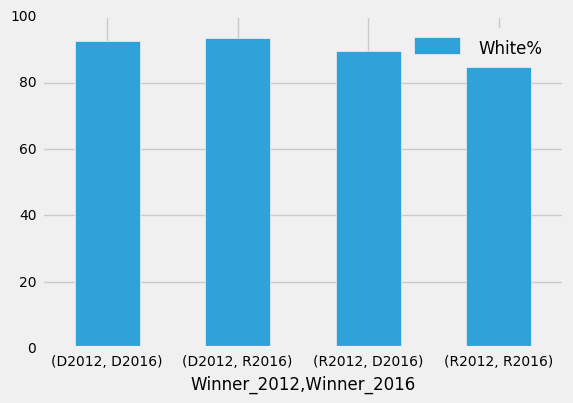

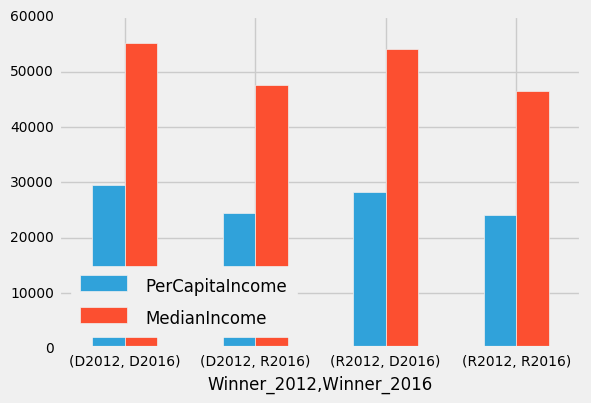

In [138]:
#((merged['Racial_Cluster']==0)|
with plt.style.context('fivethirtyeight'):
    merged[(merged['Racial_Cluster']==3)].groupby(['Winner_2012','Winner_2016']).mean()[['White%']].plot(kind="bar",rot=0)
    merged[(merged['Racial_Cluster']==3)].groupby(['Winner_2012','Winner_2016']).mean()[['PerCapitaIncome','MedianIncome']].plot(rot=0,kind="bar")
    plt.legend(loc='lower left')

In [122]:
merged[((merged['Racial_Cluster']==0)|(merged['Racial_Cluster']==3))].groupby(['Winner_2012','Winner_2016']).mean()['%BelowPoverty']

Winner_2012  Winner_2016
D2012        D2016          16.504762
             R2016          15.536364
R2012        D2016          17.866667
             R2016          16.026215
Name: %BelowPoverty, dtype: float64

In [64]:
model=AgglomerativeClustering(n_clusters=5)
merged['Owner_Cluster']=model.fit_predict(merged[racial_econo_predictors])

In [160]:
clusteringalgo(["Black-owned%","Native-owned%","Asian-owned%","PIslnder-owned%","Woman-owned"],'Winner2012','Winner2016',
               merged,merged[merged['Owner_Cluster']==1])

SVC overall accuracy for training is0.837714285714
KMeans overall accuracy for training is0.804571428571
SVC overall accuracy for predictive testing is0.892571428571
KMeans overall accuracy for predictive testing is0.848
SVC subset accuracy for testing is0.835579514825
KMeans subset accuracy for testing is0.792452830189
SVC subset accuracy for predictive testing is0.878706199461
KMeans subset accuracy for predictive testing is0.814016172507


In [175]:
merged[merged['Owner_Cluster']==1].groupby(['Winner2012','Winner2016']).mean()['Black-owned%']

Winner2012  Winner2016
0           0             1.580682
            1             1.550000
1           0             2.163333
            1             2.874667
Name: Black-owned%, dtype: float64

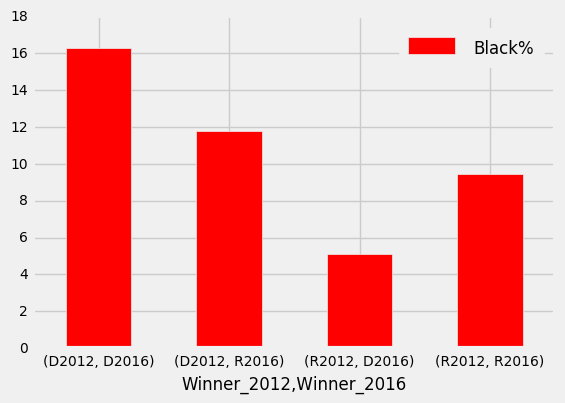

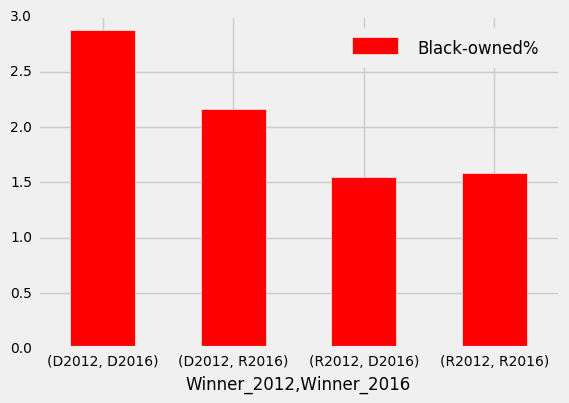

In [176]:
with plt.style.context('fivethirtyeight'):
    merged[((merged['Owner_Cluster']==1)|(merged['Owner_Cluster']==1))].groupby(['Winner_2012','Winner_2016']).mean()[['Black%']].plot(kind="bar",rot=0,legend=True,color="red")
    merged[((merged['Owner_Cluster']==1)|(merged['Owner_Cluster']==1))].groupby(['Winner_2012','Winner_2016']).mean()[['Black-owned%']].plot(kind="bar",rot=0,legend=True,color="red")

Winner_2012  Winner_2016
D2012        D2016          0.068421
             R2016          0.000000
R2012        R2016          0.251316
Name: Black-owned%, dtype: float64

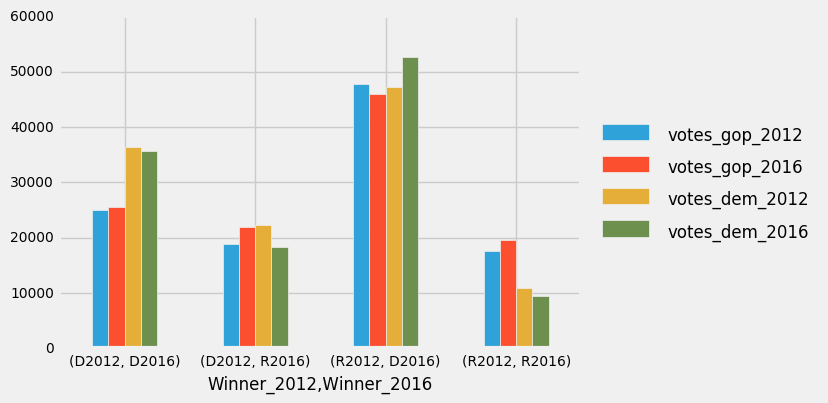

In [147]:
with plt.style.context('fivethirtyeight'):
    merged[merged['Racial_Cluster']==3].groupby(['Winner_2012','Winner_2016']).mean()[['votes_gop_2012','votes_gop_2016','votes_dem_2012','votes_dem_2016']].plot(rot=False,kind="bar")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [130]:
merged['Racial_Cluster3']

KeyError: 'Racial_Cluster3'